In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/preprocessed_data.csv')

In [2]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
cancer_type_counts = df['cancer_type'].value_counts()
df['content'] = df['content'].astype(str)
df['content_length'] = df['content'].apply(lambda x: len(x.split()))
df['log_content_length'] = np.log10(df['content_length'] + 1)

from textblob import TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [4]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Topic Modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
content_matrix = vectorizer.fit_transform(df['content'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(content_matrix)

# Print top words for each topic
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda_model.components_):
    print(f"Top words for Topic {i+1}:")
    print([feature_names[index] for index in topic.argsort()[-10:]])


#Topic 1: This topic seems to be related to experiences with surgery, pain, and medical professionals (e.g., doctors).

#Topic 2: This topic appears to be associated with medical terms related to diagnosis and treatment, such as nodes,
#biopsy, scan, tumor, and cancer.

#Topic 3: This topic might be related to personal experiences with cancer diagnosis and treatment, including interactions with
#doctors and emotional responses.

#Topic 4: This topic seems to involve aspects of life as a cancer patient, including treatment, time, and the impact on life.

#Topic 5: This topic appears to focus on specific treatment modalities like radiation and chemotherapy, as well as the experience of
#being diagnosed with cancer.

#Based on these interpretations, you can see that each topic represents a different theme or aspect related to cancer diagnosis,
#treatment, and personal experiences. These topics can provide valuable insights into the underlying structure of the corpus and help
#organize and summarize the content of the documents. Depending on your specific goals or application, you can use these topics for tasks
#such as document categorization, content recommendation, or sentiment analysis.

Top words for Topic 1:
['week', 'pain', 'like', 'year', 'ha', 'treatment', 'day', 'cancer', 'time', 'wa']
Top words for Topic 2:
['month', 'week', 'node', 'right', 'biopsy', 'year', 'scan', 'im', 'cancer', 'wa']
Top words for Topic 3:
['im', 'stage', 'week', 'diagnosed', 'treatment', 'surgery', 'ha', 'wa', 'chemo', 'cancer']
Top words for Topic 4:
['stage', 'surgery', 'year', 'diagnosed', 'chemo', 'wa', 'tumor', 'treatment', 'ha', 'cancer']
Top words for Topic 5:
['like', 'survivor', 'know', 'radiation', 'im', 'diagnosed', 'ha', 'year', 'wa', 'cancer']


In [5]:
# Select the source and target columns to create edges_df
edges_df = df[['username', 'comments']].copy()

# Display the first few rows of edges_df
print(edges_df.head())

       username                                           comments
0      drpearl   ['hi drpearl lovely hear changed thinking nega...
1       Psmall   ['hi dont usually post board happened see teet...
2         goji   ['hi im researching thc cbd want get gabapenti...
3  CanadaNorth                                                  []
4      sandysp   ['hi glad see time helped along path wa diagno...


<Figure size 1000x600 with 0 Axes>

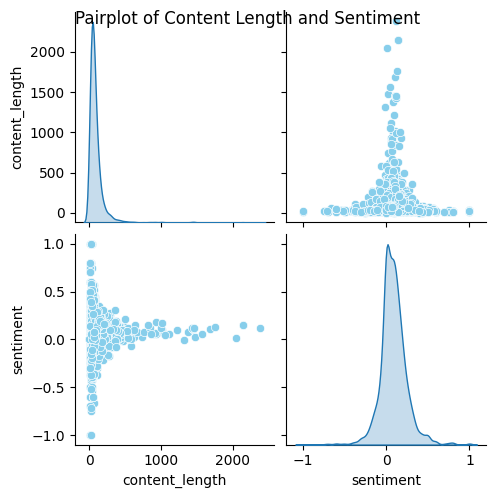

In [7]:
plt.figure(figsize=(10, 6))
pairplot = sns.pairplot(df[['content_length', 'sentiment']], diag_kind='kde', plot_kws={'color': 'skyblue'})
pairplot.fig.suptitle('Pairplot of Content Length and Sentiment')
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_12376\3575206658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cancer_type', y='sentiment', data=df, palette='pastel')


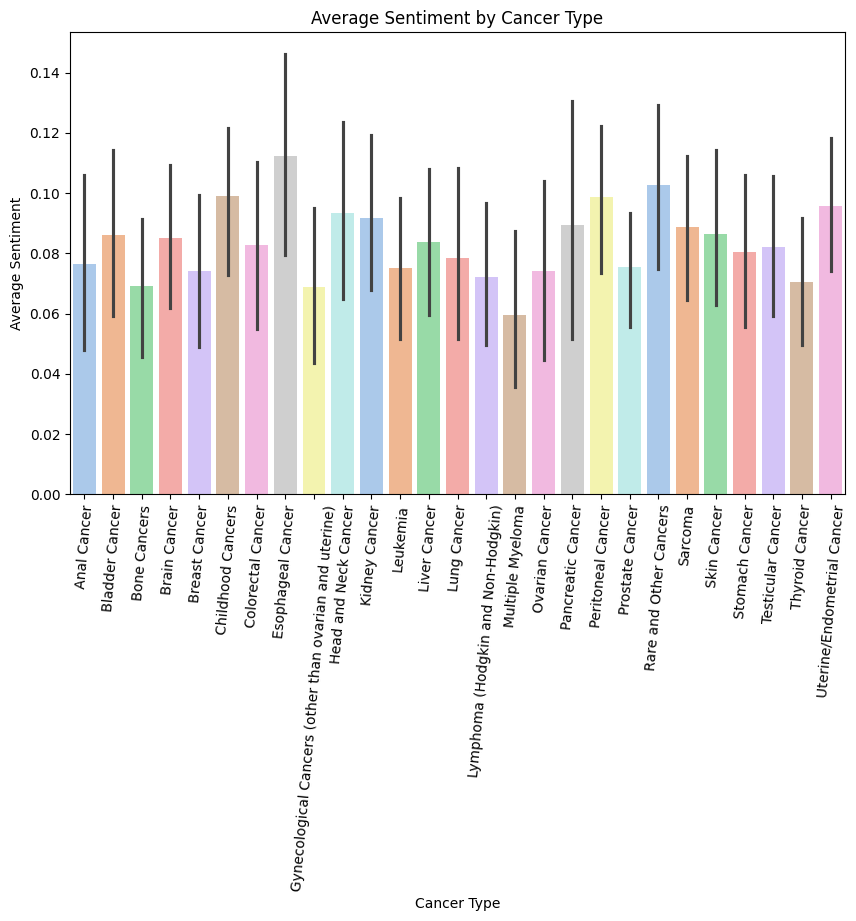

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cancer_type', y='sentiment', data=df, palette='pastel')
plt.title('Average Sentiment by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=85)
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_12376\474414292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cancer_type', y='sentiment', data=df, palette='pastel')


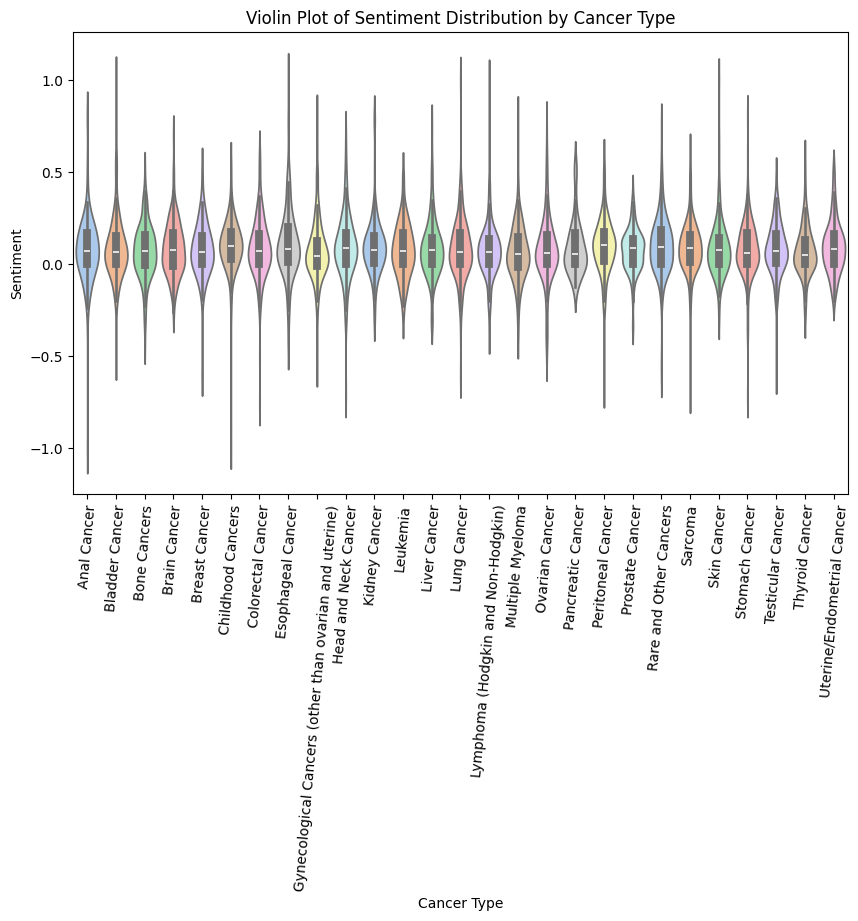

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cancer_type', y='sentiment', data=df, palette='pastel')
plt.title('Violin Plot of Sentiment Distribution by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Sentiment')
plt.xticks(rotation=85)
plt.show()

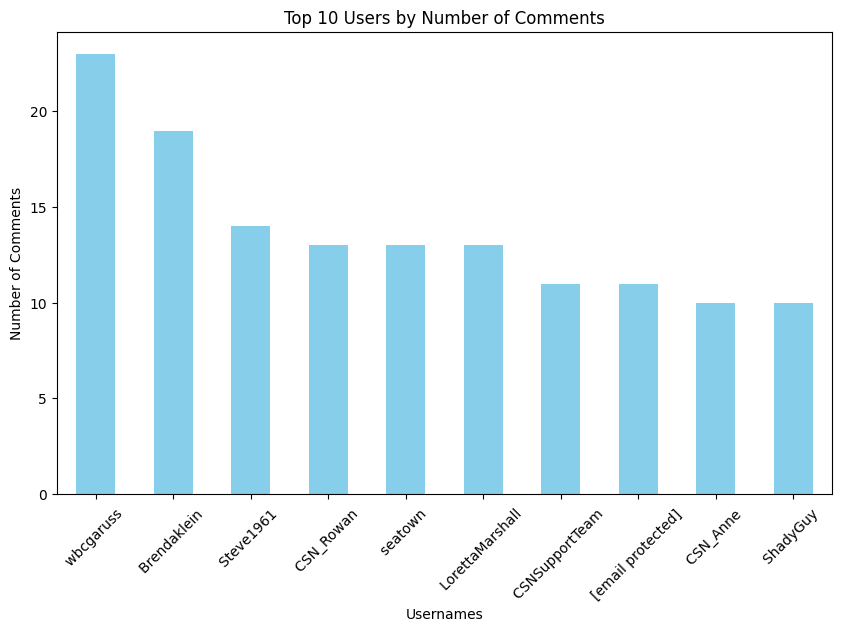

In [10]:
import matplotlib.pyplot as plt

# Group by 'username' and count the number of comments for each user
user_comment_counts = df['username'].value_counts()

# Get the top 10 users with the most comments
top_10_users = user_comment_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Users by Number of Comments')
plt.xlabel('Usernames')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


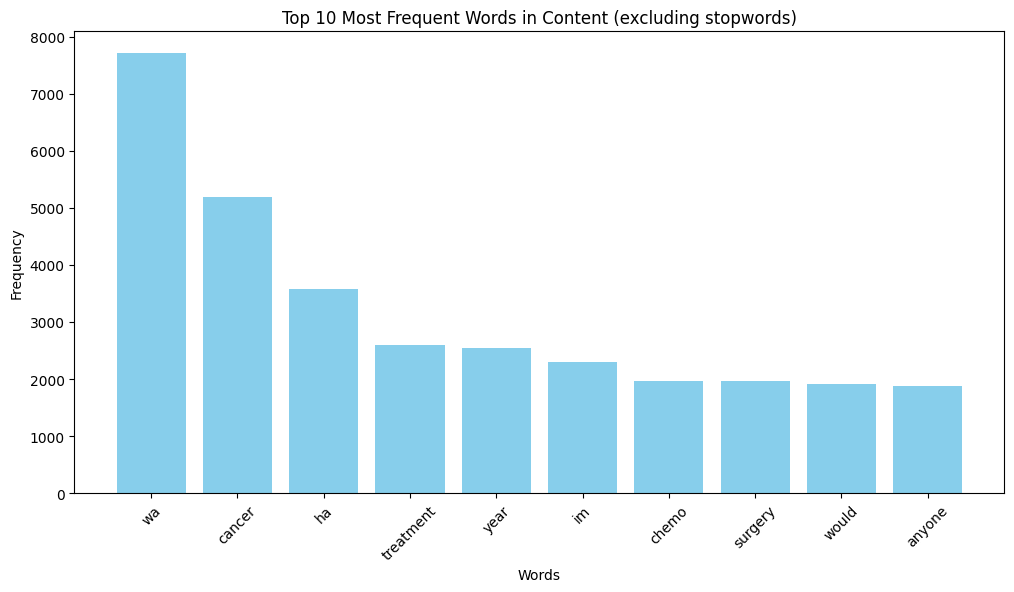

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Combine all comments into a single string
comments = ' '.join(df['content'])

# Tokenize the comments
tokens = word_tokenize(comments)

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords and non-alphabetic tokens
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Calculate frequency distribution of words
freq_dist = FreqDist(filtered_tokens)

# Get the top 10 most frequent words
top_words = freq_dist.most_common(10)

# Plot the top 10 most frequent words
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words), color='skyblue')
plt.title('Top 10 Most Frequent Words in Content (excluding stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

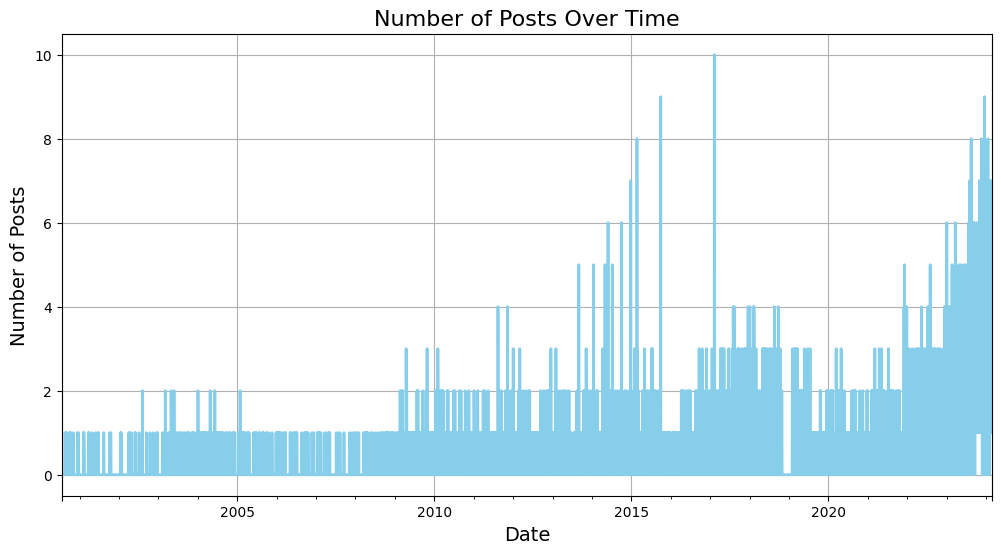

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' column already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by date and count the number of posts for each date
post_count_by_date = df.resample('D', on='date').size()

# Plot the number of posts over time
plt.figure(figsize=(12, 6))
post_count_by_date.plot(linewidth=2, color='skyblue')
plt.title('Number of Posts Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.grid(True)
plt.show()

In [13]:
!pip install python-louvain

     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/204.6 kB ? eta -:--:--
     ----------- ------------------------- 61.4/204.6 kB 825.8 kB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=81e4d975cce1979d80f973cc9bbf82a08572c99b8772dad66b11ba3fb0e4472f
  Stored in directory: c:\users\athar\appdata\local\pip\cache\wheels\40\f1\e3\485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install networkx python-louvain


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd

# Assuming 'comments' column exists in your main DataFrame 'df'
# Replace 'comments' with the appropriate column name if it differs in your dataset
df_comments = df[['username', 'comments']].dropna()  # Assuming 'comments' is the column name for comments data

# Rename columns to match the expected column names in the community network code
df_comments.rename(columns={'username': 'Author', 'comments': 'Comment'}, inplace=True)

# Display the first few rows of the newly created DataFrame
print(df_comments.head())

         Author                                            Comment
0      drpearl   ['hi drpearl lovely hear changed thinking nega...
1       Psmall   ['hi dont usually post board happened see teet...
2         goji   ['hi im researching thc cbd want get gabapenti...
3  CanadaNorth                                                  []
4      sandysp   ['hi glad see time helped along path wa diagno...
